In [1]:
import pandas as pd

df = pd.read_csv('nyc_vehicle_collisions_merged2.csv')

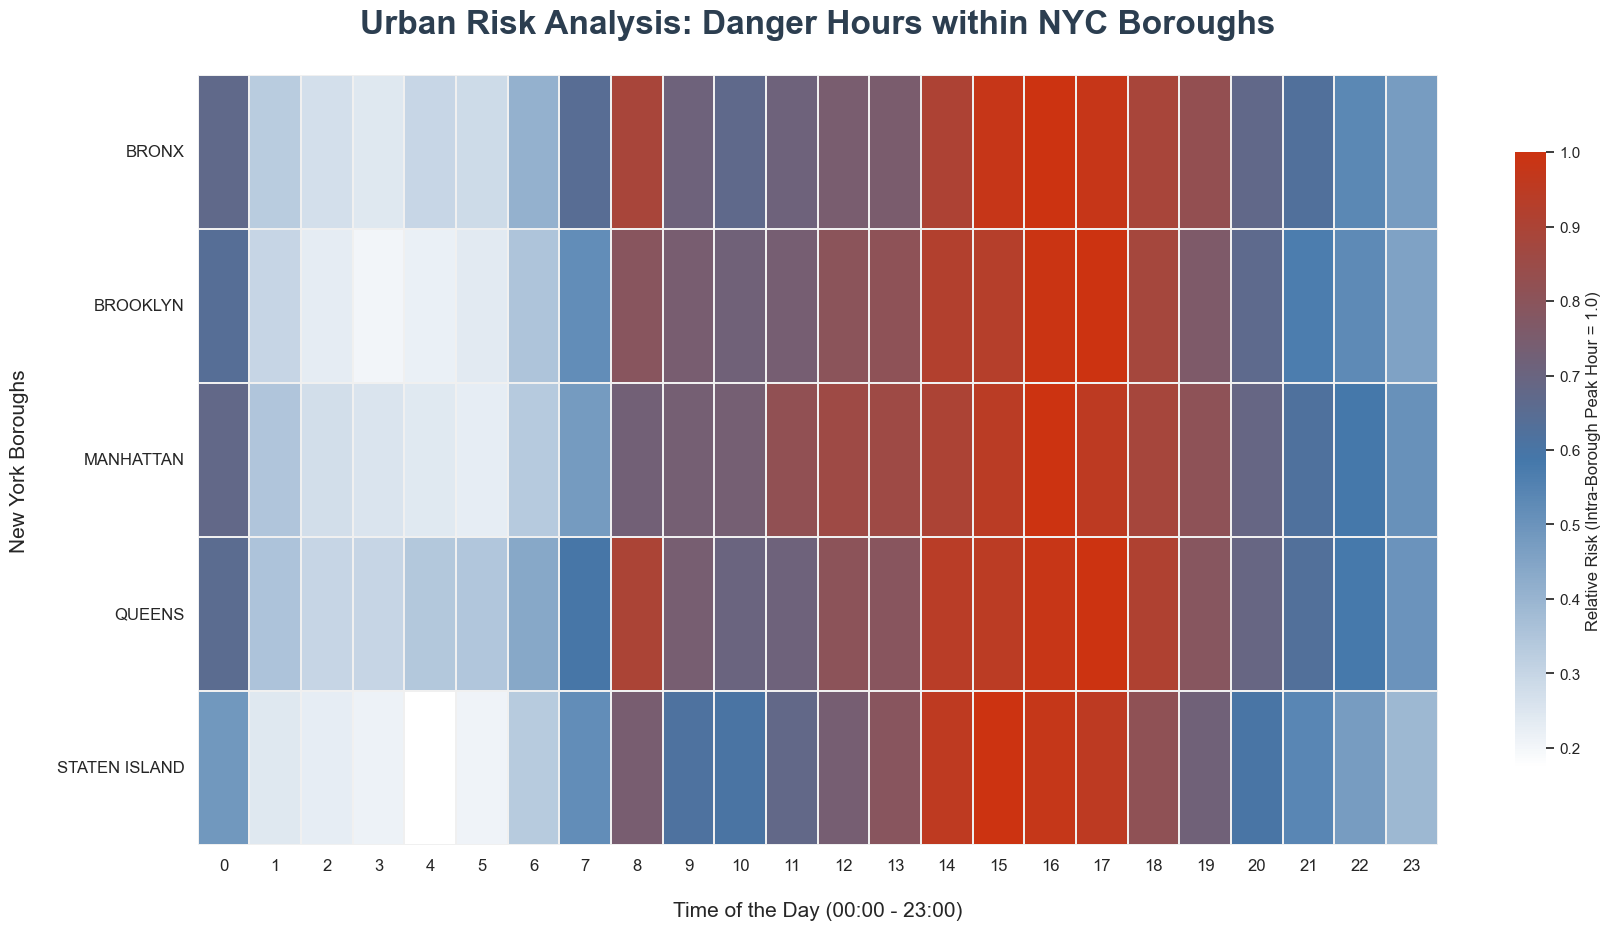

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.hour

heatmap_data = df.groupby(['borough', 'crash_time']).size().unstack(fill_value=0)

heatmap_data_norm = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

colors = ["#ffffff", "#4477aa", "#cc3311"]
custom_cmap = LinearSegmentedColormap.from_list("modern_risk", colors)

plt.figure(figsize=(20, 10))
sns.set_theme(style="white")

ax = sns.heatmap(heatmap_data_norm,
                 cmap=custom_cmap,
                 linewidths=0.05,
                 linecolor='#f0f0f0',
                 cbar_kws={'label': 'Relative Risk (Intra-Borough Peak Hour = 1.0)', 'shrink': .8},
                 square=False)

plt.title('Urban Risk Analysis: Danger Hours within NYC Boroughs',
          fontsize=24, pad=30, fontweight='bold', color='#2c3e50')

plt.xlabel('Time of the Day (00:00 - 23:00)', fontsize=15, labelpad=20)
plt.ylabel('New York Boroughs', fontsize=15, labelpad=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

# Save the plot
plt.savefig('crash_density_heatmap_optimized.png', dpi=300, bbox_inches='tight')
plt.show()

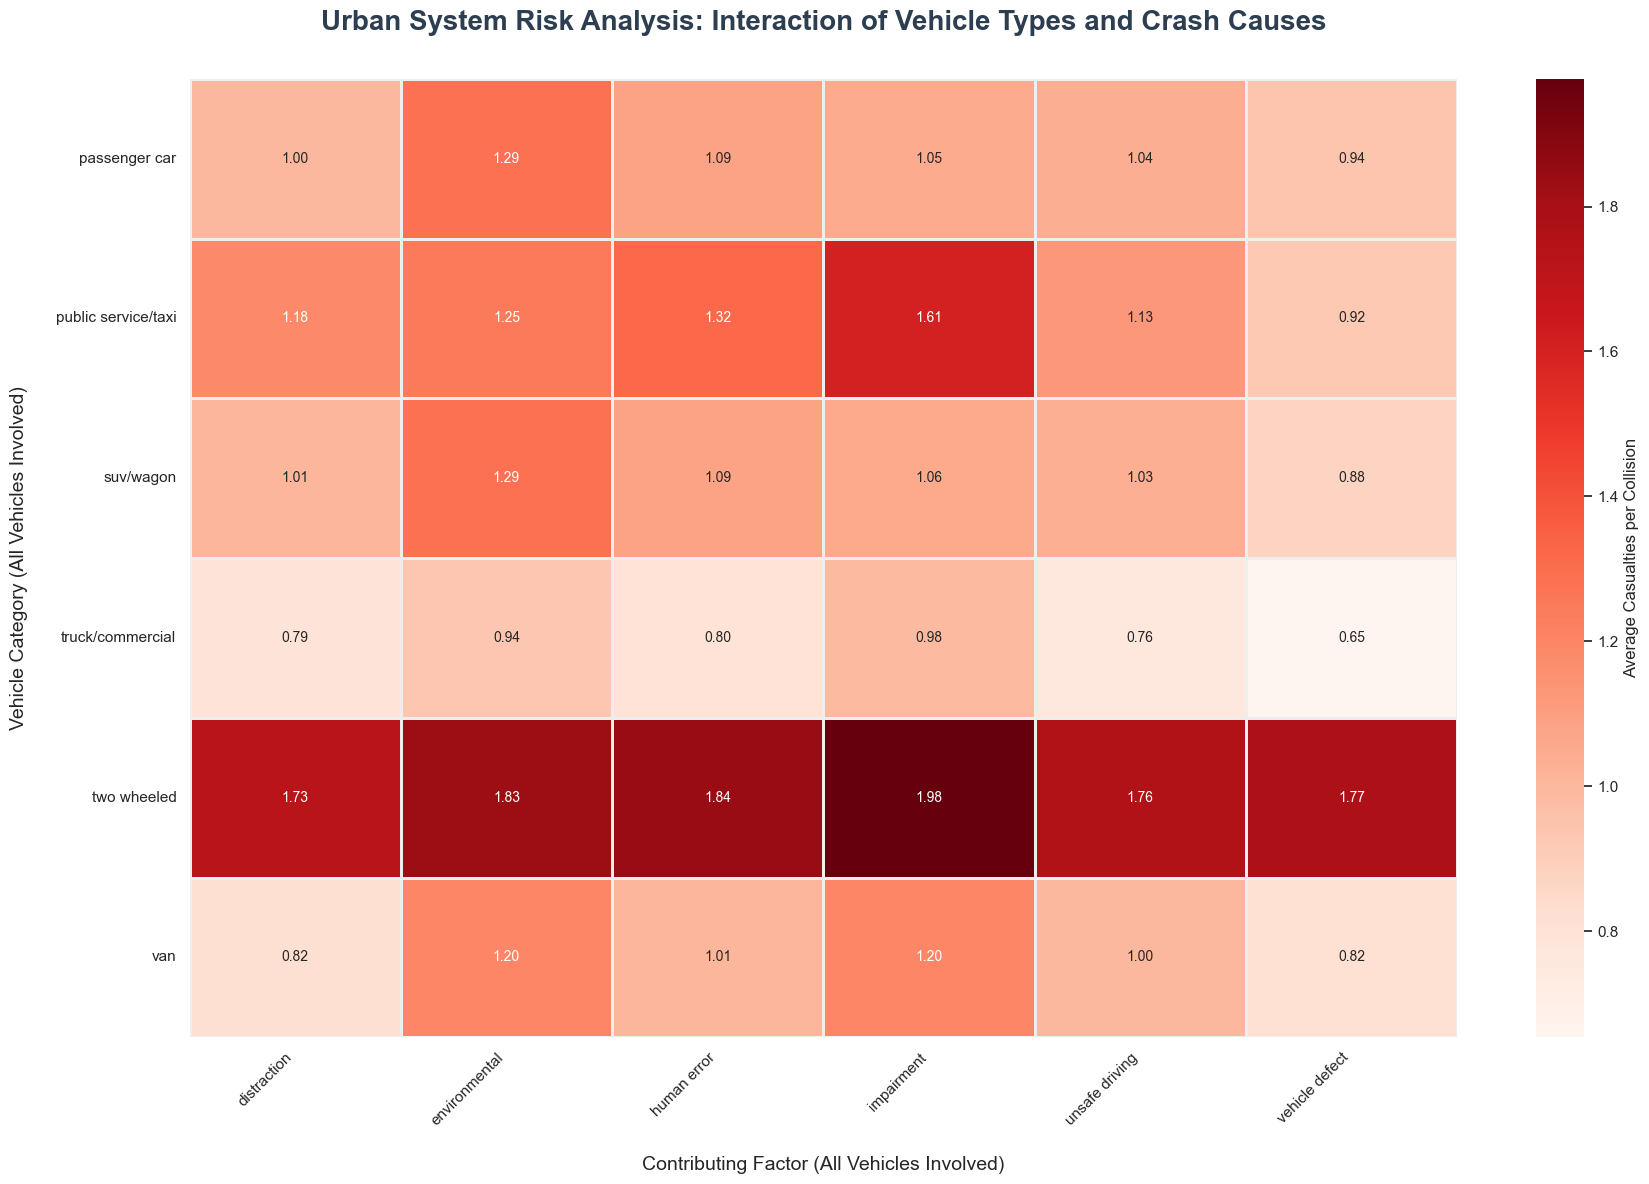

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

severity_cols = [
    'number_of_persons_injured', 'number_of_persons_killed',
    'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
    'number_of_cyclist_injured', 'number_of_cyclist_killed',
    'number_of_motorist_injured', 'number_of_motorist_killed'
]
df['total_casualties'] = df[severity_cols].sum(axis=1)

v1_data = df[['vehicle_type_code1', 'contributing_factor_vehicle_1', 'total_casualties']].copy()
v1_data.columns = ['vehicle_type', 'factor', 'total_casualties']

v2_data = df[['vehicle_type_code2', 'contributing_factor_vehicle_2', 'total_casualties']].copy()
v2_data.columns = ['vehicle_type', 'factor', 'total_casualties']

combined_data = pd.concat([v1_data, v2_data], ignore_index=True)

combined_data = combined_data[~combined_data['factor'].isin(['unspecified', 'not applicable'])]
combined_data = combined_data[~combined_data['vehicle_type'].isin(['not applicable', 'unknown'])]

risk_matrix = combined_data.pivot_table(
    index='vehicle_type',
    columns='factor',
    values='total_casualties',
    aggfunc='mean'
)

plt.figure(figsize=(18, 12))
sns.set_theme(style="white")

ax = sns.heatmap(risk_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="Reds",
                 linewidths=0.8,
                 linecolor='#eeeeee',
                 cbar_kws={'label': 'Average Casualties per Collision'},
                 annot_kws={"size": 10})

plt.title('Urban System Risk Analysis: Interaction of Vehicle Types and Crash Causes',
          fontsize=20, pad=35, fontweight='bold', color='#2c3e50')

plt.xlabel('Contributing Factor (All Vehicles Involved)', fontsize=14, labelpad=20)
plt.ylabel('Vehicle Category (All Vehicles Involved)', fontsize=14, labelpad=20)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.savefig('comprehensive_risk_matrix_v2.png', dpi=300, bbox_inches='tight')
plt.show()

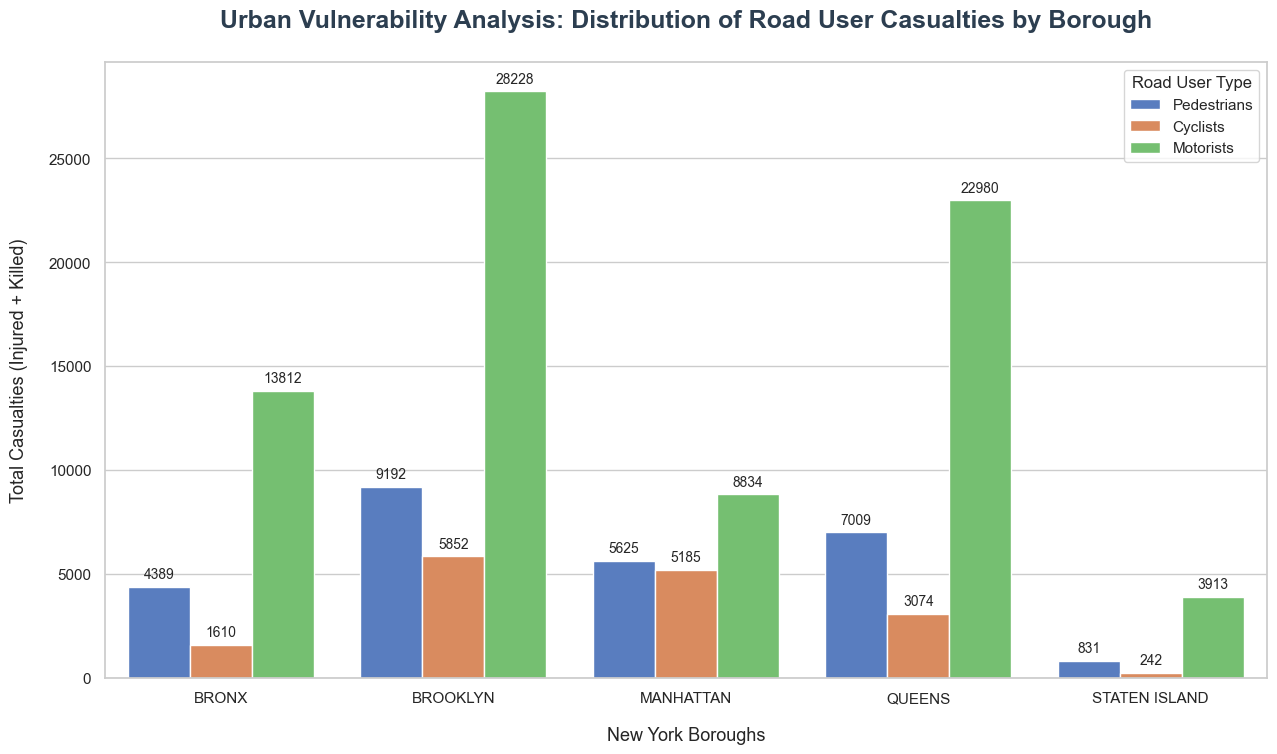

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

analysis_df = df.groupby('borough').agg({
    'number_of_pedestrians_injured': 'sum',
    'number_of_pedestrians_killed': 'sum',
    'number_of_cyclist_injured': 'sum',
    'number_of_cyclist_killed': 'sum',
    'number_of_motorist_injured': 'sum',
    'number_of_motorist_killed': 'sum'
}).reset_index()

analysis_df['Pedestrians'] = analysis_df['number_of_pedestrians_injured'] + analysis_df['number_of_pedestrians_killed']
analysis_df['Cyclists'] = analysis_df['number_of_cyclist_injured'] + analysis_df['number_of_cyclist_killed']
analysis_df['Motorists'] = analysis_df['number_of_motorist_injured'] + analysis_df['number_of_motorist_killed']

plot_df = analysis_df.melt(id_vars='borough', value_vars=['Pedestrians', 'Cyclists', 'Motorists'],
                           var_name='User_Type', value_name='Total_Casualties')

plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid")

sns.barplot(data=plot_df, x='borough', y='Total_Casualties', hue='User_Type', palette='muted')

plt.title('Urban Vulnerability Analysis: Distribution of Road User Casualties by Borough',
          fontsize=18, pad=25, fontweight='bold', color='#2c3e50')
plt.xlabel('New York Boroughs', fontsize=13, labelpad=15)
plt.ylabel('Total Casualties (Injured + Killed)', fontsize=13, labelpad=15)
plt.legend(title='Road User Type', fontsize=11)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center',
                           xytext=(0, 9),
                           textcoords='offset points',
                           fontsize=10)

plt.savefig('urban_vulnerability_distribution.png', dpi=300, bbox_inches='tight')
plt.show()